# Récupération des données

La première chose à faire pour travailler avec des données est de les récupérer !! Toutes les données de la monnaie sont archivées dans la blockchain Duniter. Pour en savoir plus sur le logiciel Duniter, veuillez consulter le site https://duniter.fr/. Ce travail préliminaire n'étant pas très intéressant, je ne le couvrirai pas dans ce cours. La démarche que j'ai adoptée est la suivante :

- récupérer un export de la blockchain au format JSON
- parcourir les blocs pour y récupérer les informations souhaitées
- réaliser des pré-calculs sur ces données
- exporter le tout dans plusieurs formats (JSON, CSV, ...)
- réaliser certains plots (PNG, SVG, HTML/JS)
- servir ces fichiers publiquement pour permettre à tout le monde de jouer avec

Le code est disponible sur le dépôt [Datajune.jl](https://git.42l.fr/HugoTrentesaux/DataJune.jl) et les données sur le site http://datajune.coinduf.eu/ (encore très préliminaire). Pour ce cours, nous travaillerons avec les données du dossier `data` inclu dans ce dépôt.

## Chargement des données (nombre de membres)

Nous allons voir plusieurs manières de charger des données qui nous permettront de rentrer petit à petit dans l'utilisation de Julia de manière concrète.

In [7]:
# chargement depuis un fichier texte

membres = readlines("data/membres.txt")

1458-element Vector{String}:
 "59"
 "59"
 "59"
 "59"
 "59"
 "62"
 "62"
 "62"
 "62"
 "62"
 "64"
 "65"
 "65"
 ⋮
 "2836"
 "2844"
 "2838"
 "2838"
 "2835"
 "2833"
 "2837"
 "2838"
 "2843"
 "2844"
 "2846"
 "2851"

On charge ici le contenu du fichier `membres.txt` ligne par ligne dans un `Vector{String}`, une liste dont chaque élément est une chaîne de texte. Pour en savoir plus sur la fonction `readlines`, on peut accéder à l'aide ainsi :

In [8]:
?readlines

search: readlines readline readlink



```
readlines(io::IO=stdin; keep::Bool=false)
readlines(filename::AbstractString; keep::Bool=false)
```

Read all lines of an I/O stream or a file as a vector of strings. Behavior is equivalent to saving the result of reading [`readline`](@ref) repeatedly with the same arguments and saving the resulting lines as a vector of strings.

# Examples

```jldoctest
julia> open("my_file.txt", "w") do io
           write(io, "JuliaLang is a GitHub organization.\nIt has many members.\n");
       end
57

julia> readlines("my_file.txt")
2-element Vector{String}:
 "JuliaLang is a GitHub organization."
 "It has many members."

julia> readlines("my_file.txt", keep=true)
2-element Vector{String}:
 "JuliaLang is a GitHub organization.\n"
 "It has many members.\n"

julia> rm("my_file.txt")
```


Nous savons que chaque chaîne représente un entier, nous pouvons donc changer notre variable `membres` pour être un vecteur d'entier.

In [9]:
# conversion du texte en nombre

membres = parse.(Int, membres)

1458-element Vector{Int64}:
   59
   59
   59
   59
   59
   62
   62
   62
   62
   62
   64
   65
   65
    ⋮
 2836
 2844
 2838
 2838
 2835
 2833
 2837
 2838
 2843
 2844
 2846
 2851

Ici, il y a plusieurs choses à analyser.

1. on remplace notre variable membres `Vector{String}` par une variable `Vector{Int64}` les valeurs précédentes seront oubliées (*garbage collected*)
1. on utilise la fonction `parse` avec l'opérateur de broadcasting `.` qui permet de l'appliquer sur chaque élément de `membres`
1. on définit le type attendu comme `Int` (entier) qui est un alias pour `Int64` (entier codé sur 64 bits) sur les machines 64 bits

On a donc une [série temporelle](https://fr.wikipedia.org/wiki/S%C3%A9rie_temporelle) qui représente le nombre de membres jour par jour depuis le 8 mars 2017. Représentons donc ces dates.

In [10]:
# utilisation de la bibliothèque Dates pour créer les abscisses

using Dates

dates = range(Date("2017-03-08"), step=Dates.Day(1), length=length(membres))

Date("2017-03-08"):Day(1):Date("2021-03-04")

In [11]:
# utilisation de la bibliothèque Plots pour afficher une courbe

using Plots

plotly()

plot(dates, membres) # peut prendre plusieurs secondes à la première exécution
title!("nombre de membres de la Ğ1 au cours du temps")

En Julia, la convention est de nommer les fonctions qui modifient l'état avec un point d'exclamation à la fin. Ainsi `plot()` crée une nouvelle figure alors que `plot!()` ajoute des données à la figure actuelle.

## Chargement des données (certifications)

Pour travailler avec les certifications de la toile de confiance, nous allons utiliser la bibliothèque [LightGraphs.jl](https://juliagraphs.org/LightGraphs.jl/stable/) et [GraphPlot](https://juliagraphs.org/GraphPlot.jl/) pour l'affichage. Nous allons manipuler la toile de confiance au premier jour (n°1) qui est de petite taille (59 membres). Chaque membre est associé à un numéro correspondant à sa première apparition en blockchain. Le graphe est stocké au format texte `0001.lg`, le numéro correspondant au jour écoulé depuis le début.

La fonction `gplot` calcule par défaut un `spring_layout` si aucune position n'est donnée. Cet aspect est détaillé en chapitre "Force Layout".

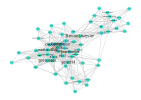

In [12]:
using LightGraphs, GraphPlot

pseudos = readlines("data/pseudos.txt");
graph = loadgraph("data/0001.lg");

gplot(
    graph, # le graphe à afficher
    nodelabel = pseudos, # les pseudos correspondant à chaque noeud 
    arrowlengthfrac = 0, # ne pas afficher les pointes des flèches
    nodelabelsize = degree(graph), # affiche les noms des personnes connectées en plus gros
)

## Conclusion

Nous avons chargé et affiché des données élémentaires en visitant des concepts clé du langage Julia. Dans la suite du cours, nous allons voir comment analyser ces données.

- variables
- vecteurs
- aide Julia
- broadcasting
- types élémentaires
- bibliothèques